<h1><center>Performance Assessment Task 1 - Linear Regression Modeling</center></h1>
<h3><center> by Bader Ale <center><h3>

# ▶ Research Question
Our research questions is as follows: __What caused the highest amount of total charges to the patient during their stay__.

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing origiginal dataset
df = pd.read_csv('F:\GitHub Repos\WGU_MSDA\D208_Predictive Modeling\medical_clean.csv')

# ▶ Data Cleaning  

Target variable for task 1:  __*TotalCharge*__  
Explanatory variable(s) for task 1: __*Age*__  , __*Income*__  , __*Gender*__, __*Initial_Admin*__  , __*Complication_Risk*__  , __*Services*__ , __*Initial_Days*__  

In [3]:
# Showing first 5 records
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# Creating new dataframe with only those variables of interest
df1 = df[['Age', 'Income', 'Gender', 'Doc_visits', 'Initial_admin', 'Complication_risk', 'Services', 'Initial_days', 'TotalCharge']]
df1.head()

,Age,Income,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge
0,53,86575.93,Male,6,Emergency Admission,Medium,Blood Work,10.585770,3726.702860
1,51,46805.99,Female,4,Emergency Admission,High,Intravenous,15.129562,4193.190458
2,53,14370.14,Female,4,Elective Admission,Medium,Blood Work,4.772177,2434.234222
3,78,39741.49,Male,4,Elective Admission,Medium,Blood Work,1.714879,2127.830423
4,22,1209.56,Female,5,Elective Admission,Low,CT Scan,1.254807,2113.073274


## Detection and Treatment of Nulls

In [5]:
# Getting number of rows and columns
df1.shape

(10000, 9)

In [6]:
# Checking for null values
df1.isnull().sum()

Age                  0
Income               0
Gender               0
Doc_visits           0
Initial_admin        0
Complication_risk    0
Services             0
Initial_days         0
TotalCharge          0
dtype: int64

Here we can see there are no Nulls in our new dataframe

## Detection and Treatment of Duplicated Values

In [7]:
# Checking for duplicates
df1.duplicated().value_counts()

False    10000
dtype: int64

The output shows 10000 records as being False, therefore we do not have any duplicated values.

## Detection and Treatment of Outliers

In [8]:
# Checking datatypes for all variables in new dataframe
df1.dtypes

Age                    int64
Income               float64
Gender                object
Doc_visits             int64
Initial_admin         object
Complication_risk     object
Services              object
Initial_days         float64
TotalCharge          float64
dtype: object

We will first focus on the continuous variables and analyze, if any, the outliers. We will normalize our data for ease of visual interpretation

In [9]:
# Performing normalization on the continuous variables for the new dataframe
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df1[['Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge']]) # Selecting only those numerical variables in our new dataframe
scaled = scaler.fit_transform(df1[['Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge']])
df1_norm = pd.DataFrame(scaled, columns = ('Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge')) # Creating a new dataframe for visualization

MinMaxScaler()

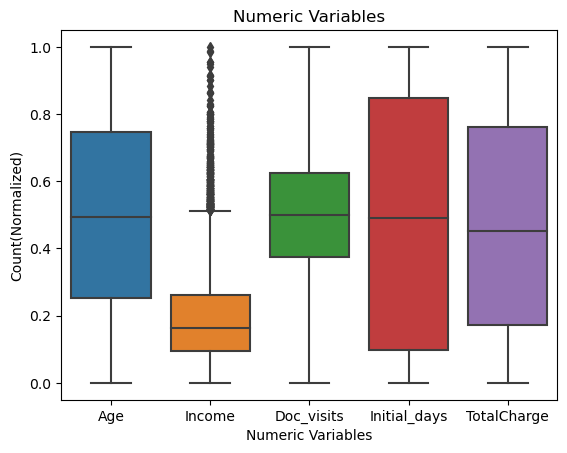

In [10]:
# Plotting the normalized, numerical data 
sns.boxplot(df1_norm)
plt.title('Numeric Variables')
plt.ylabel('Count(Normalized)')
plt.xlabel('Numeric Variables');

We can see Income is the only numeric variable with outliers. We will use z-scores greater than 3 to eliminate those outliers

In [11]:
# Importing SciPy library
import scipy.stats as stats

In [12]:
# Creating a new column for the Income z-scores
df1['Income_z_Scores'] = stats.zscore(df1['Income'])

In [13]:
df1.head(10)

,Age,Income,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge,Income_z_Scores
0,53,86575.93,Male,6,Emergency Admission,Medium,Blood Work,10.585770,3726.702860,1.615914
1,51,46805.99,Female,4,Emergency Admission,High,Intravenous,15.129562,4193.190458,0.221443
2,53,14370.14,Female,4,Elective Admission,Medium,Blood Work,4.772177,2434.234222,-0.915870
3,78,39741.49,Male,4,Elective Admission,Medium,Blood Work,1.714879,2127.830423,-0.026263
4,22,1209.56,Female,5,Elective Admission,Low,CT Scan,1.254807,2113.073274,-1.377325
5,76,81999.88,Male,6,Observation Admission,Medium,Blood Work,5.957250,2636.691180,1.455462
6,50,10456.05,Male,6,Emergency Admission,Low,Intravenous,9.058210,3694.627161,-1.053111
7,40,38319.29,Female,7,Observation Admission,Medium,Intravenous,14.228019,3021.499039,-0.076130
8,48,55586.48,Male,6,Emergency Admission,Low,Intravenous,6.180339,2968.402860,0.529317
9,78,38965.22,Female,7,Emergency Admission,High,Blood Work,1.632554,3147.855813,-0.053481


In [14]:
# Creating a new dataframe with extracted Income outliers
df1_no_outliers = df1[(df1['Income_z_Scores'] > -3) & (df1['Income_z_Scores'] < 3)]

In [15]:
# Dropping the Income_z_Scores columns since
# we won't need it anymore
df1_no_outliers.drop(['Income_z_Scores'], axis=1, inplace=True)

In [16]:
# Checking for Income_z_Score column drop
df1_no_outliers.head()

,Age,Income,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge
0,53,86575.93,Male,6,Emergency Admission,Medium,Blood Work,10.585770,3726.702860
1,51,46805.99,Female,4,Emergency Admission,High,Intravenous,15.129562,4193.190458
2,53,14370.14,Female,4,Elective Admission,Medium,Blood Work,4.772177,2434.234222
3,78,39741.49,Male,4,Elective Admission,Medium,Blood Work,1.714879,2127.830423
4,22,1209.56,Female,5,Elective Admission,Low,CT Scan,1.254807,2113.073274


# ▶ Exploratory Data Analysis  

In [17]:
# Summary Statistics
df1_no_outliers.describe()

,Age,Income,Doc_visits,Initial_days,TotalCharge
count,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000
mean,53.537283,38908.927266,5.010855,34.483667,5314.860400
std,20.633456,25392.839109,1.043972,26.305266,2180.227407
min,18.000000,154.080000,1.000000,1.001981,1938.312067
25%,36.000000,19370.980000,4.000000,7.912315,3181.679327
50%,53.000000,33292.200000,5.000000,36.270750,5252.764000
75%,71.000000,53275.410000,6.000000,61.170620,7460.305000
max,89.000000,125977.370000,9.000000,71.981490,9180.728000


In [18]:
df1_no_outliers.dtypes

Age                    int64
Income               float64
Gender                object
Doc_visits             int64
Initial_admin         object
Complication_risk     object
Services              object
Initial_days         float64
TotalCharge          float64
dtype: object

## Univariate Analysis  
### Numeric Variables

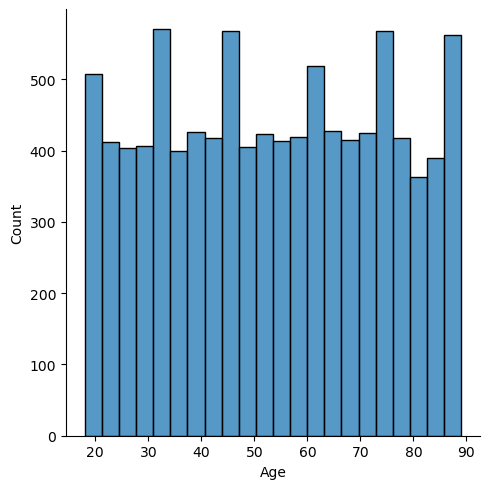

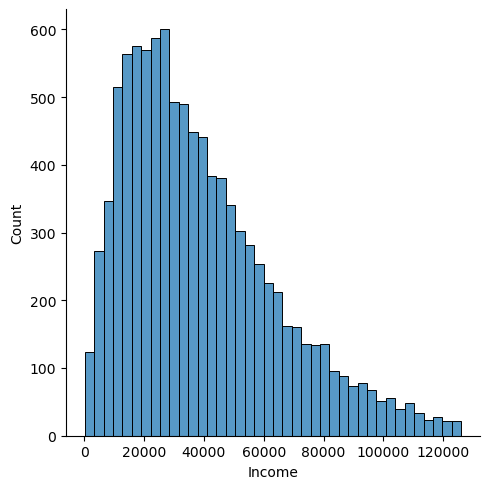

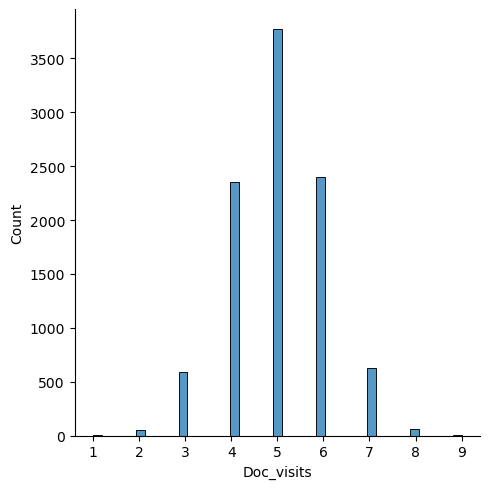

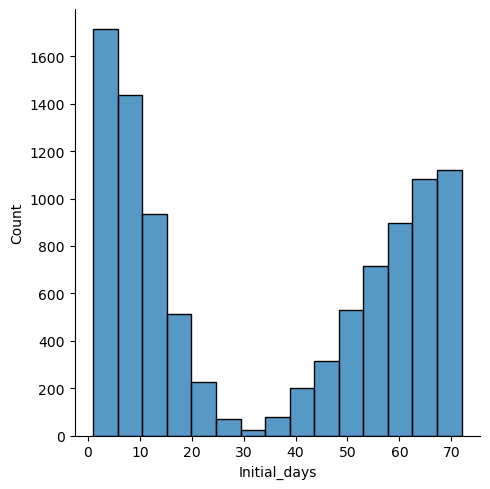

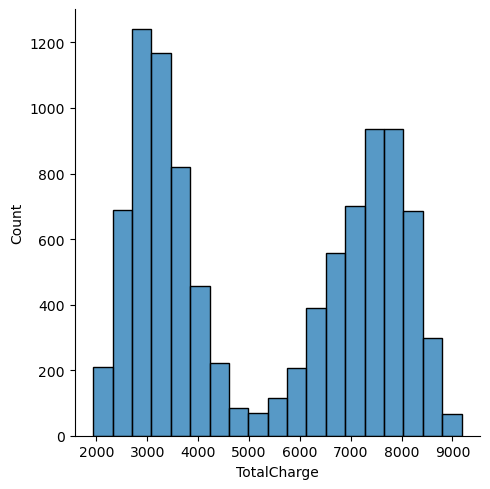

In [19]:
# Univariate analysis visualizations for numerical variables
sns.displot(df1_no_outliers['Age']);
sns.displot(df1_no_outliers['Income']);
sns.displot(df1_no_outliers['Doc_visits']);
sns.displot(df1_no_outliers['Initial_days']);
sns.displot(df1_no_outliers['TotalCharge']);

### Categorical Variables

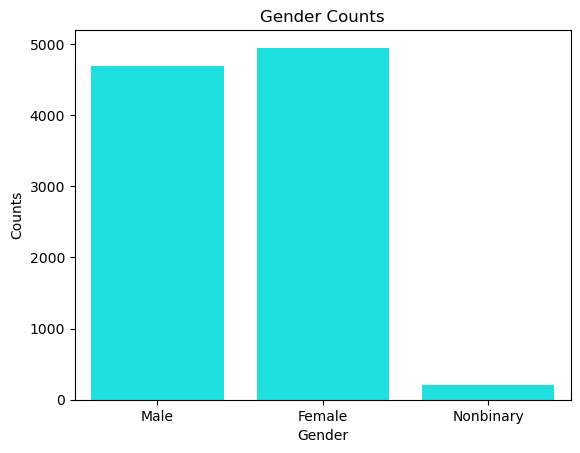

In [20]:
# Gender Countplot
sns.countplot(df1_no_outliers, x='Gender',color='aqua')
plt.title('Gender Counts')
plt.ylabel('Counts');

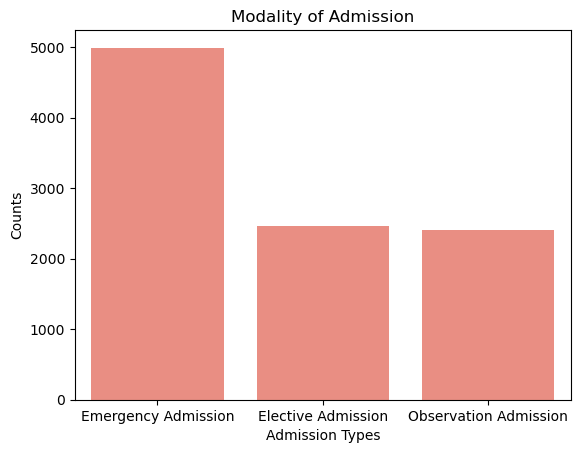

In [21]:
# Initial_admin Countplot
sns.countplot(df1_no_outliers, x='Initial_admin',color='salmon')
plt.title('Modality of Admission')
plt.xlabel('Admission Types')
plt.ylabel('Counts');

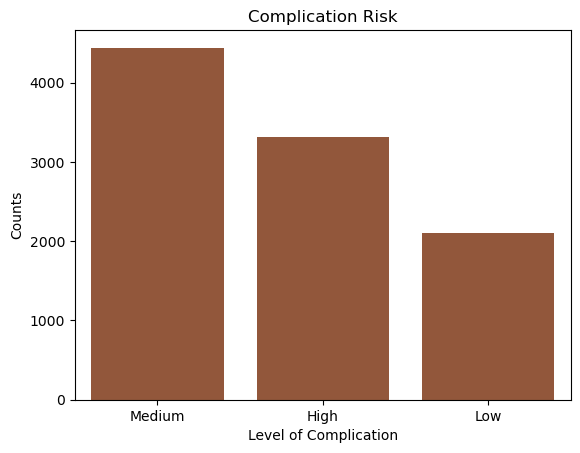

In [22]:
# Complication Risk Countplot
sns.countplot(df1_no_outliers, x='Complication_risk',color='sienna')
plt.title('Complication Risk')
plt.xlabel('Level of Complication')
plt.ylabel('Counts');

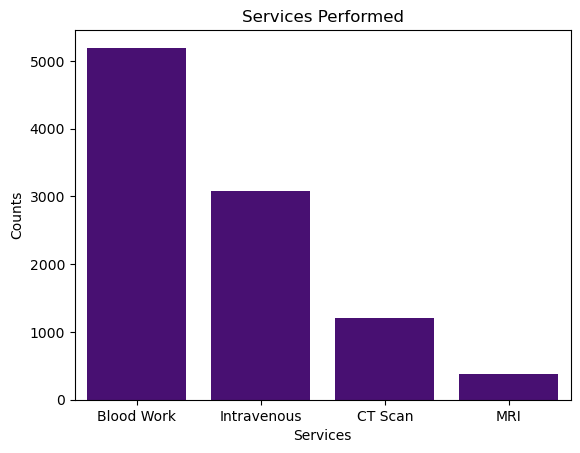

In [23]:
# Services Countplot
sns.countplot(df1_no_outliers, x='Services',color='indigo')
plt.title('Services Performed')
plt.xlabel('Services')
plt.ylabel('Counts');

## Bivariate Analysis  
### Numeric Variables

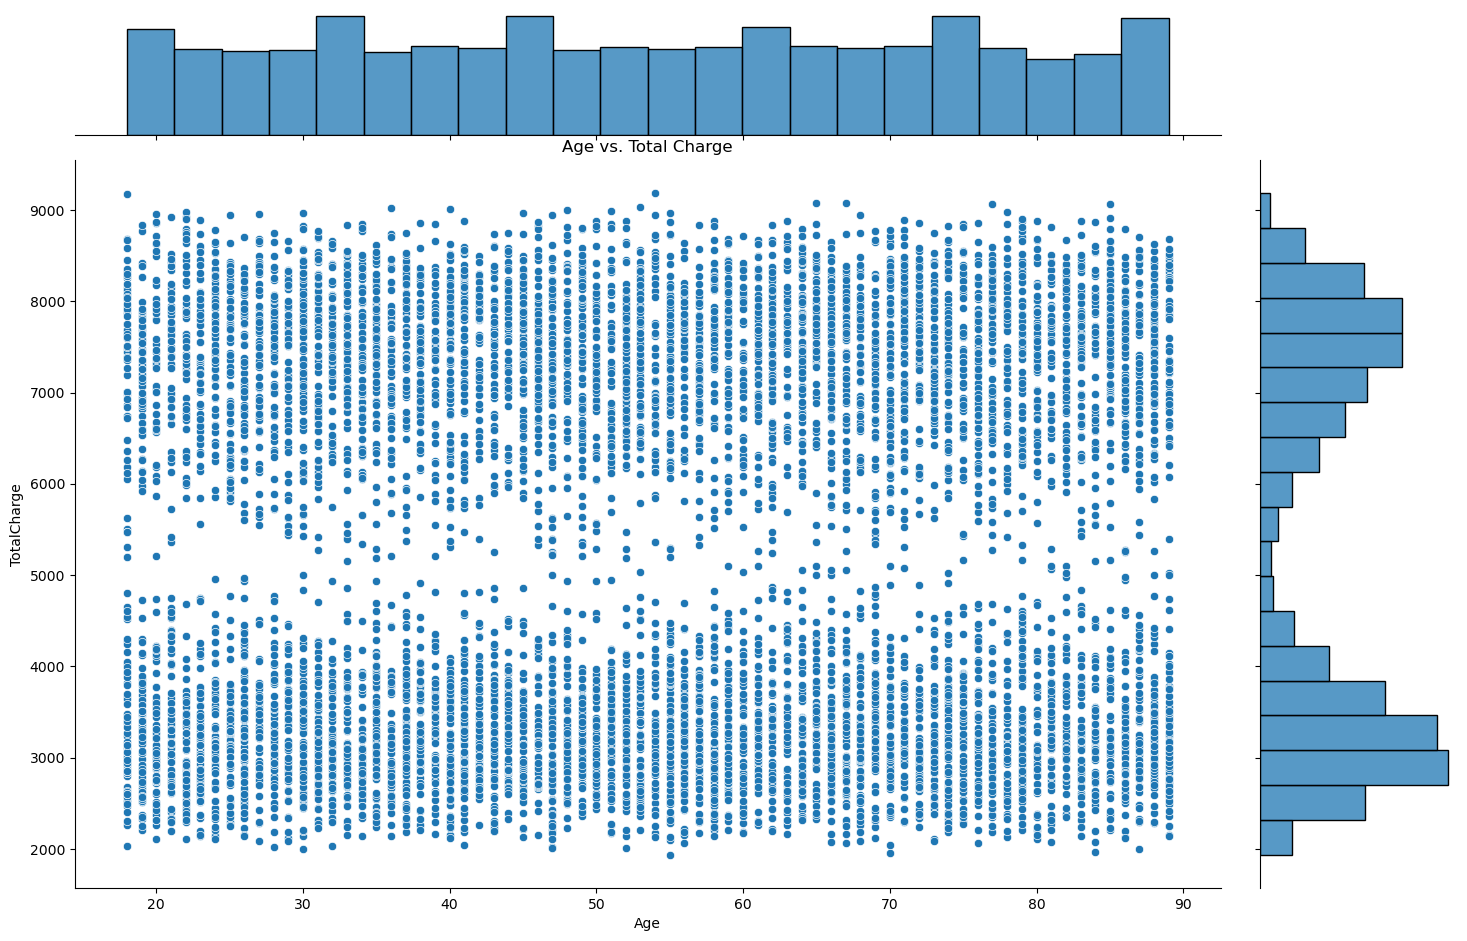

In [24]:
# Bivariate analysis visualizations for Age vs Total_Charge
sns.jointplot(data=df1_no_outliers, x='Age', y='TotalCharge')
plt.title('Age vs. Total Charge')
fig = plt.gcf()
fig.set_size_inches(16, 10);

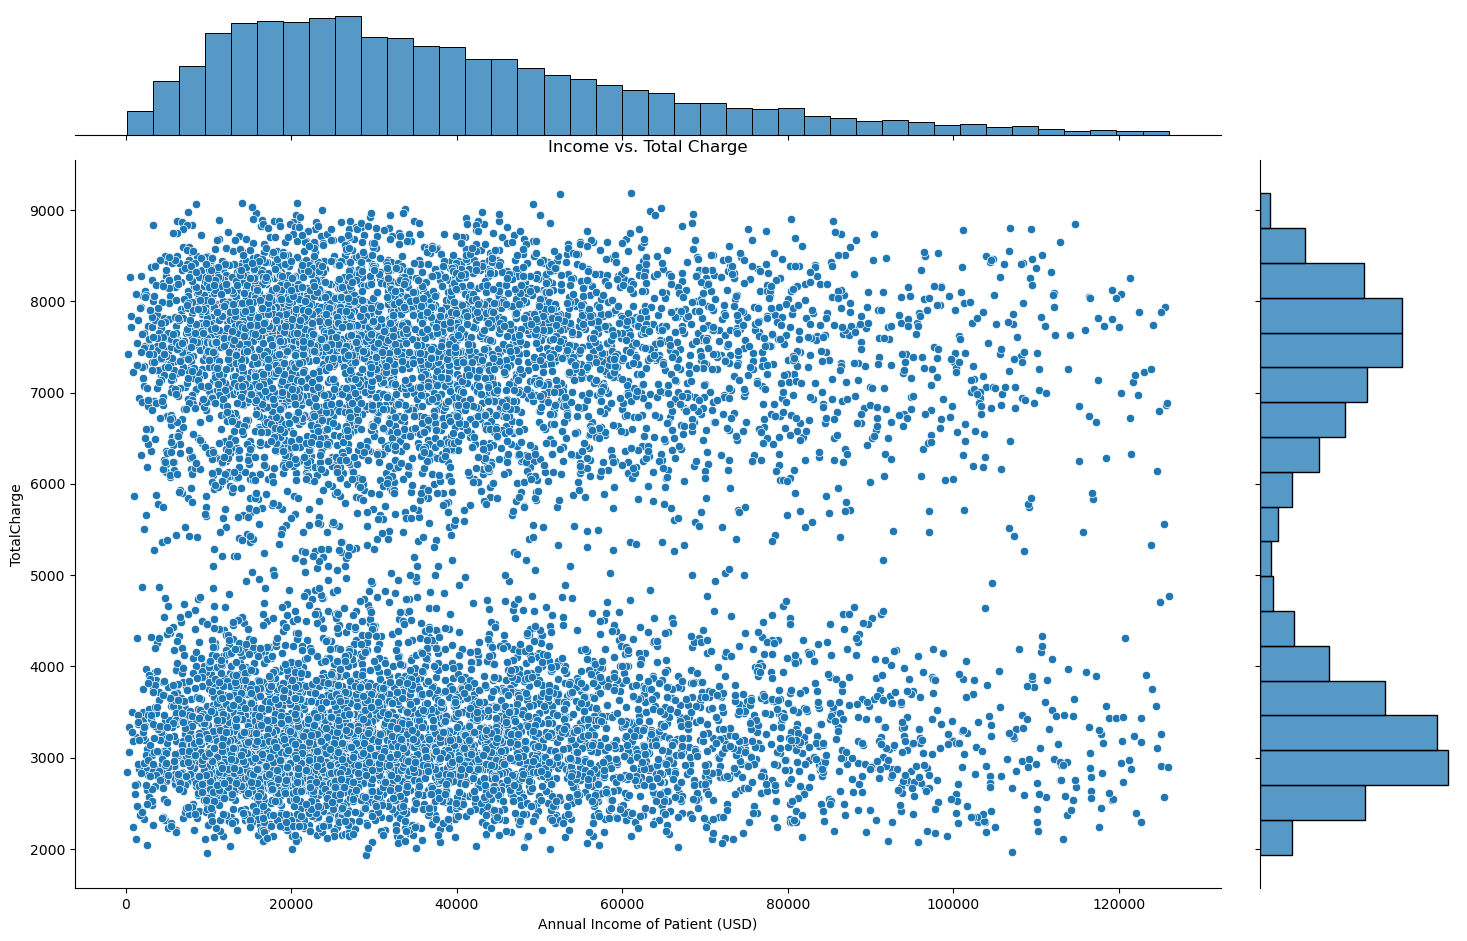

In [25]:
# Income vs Total Charge
sns.jointplot(data=df1_no_outliers, x='Income', y='TotalCharge')
plt.title('Income vs. Total Charge')
plt.xlabel('Annual Income of Patient (USD)')
fig = plt.gcf()
fig.set_size_inches(16, 10);

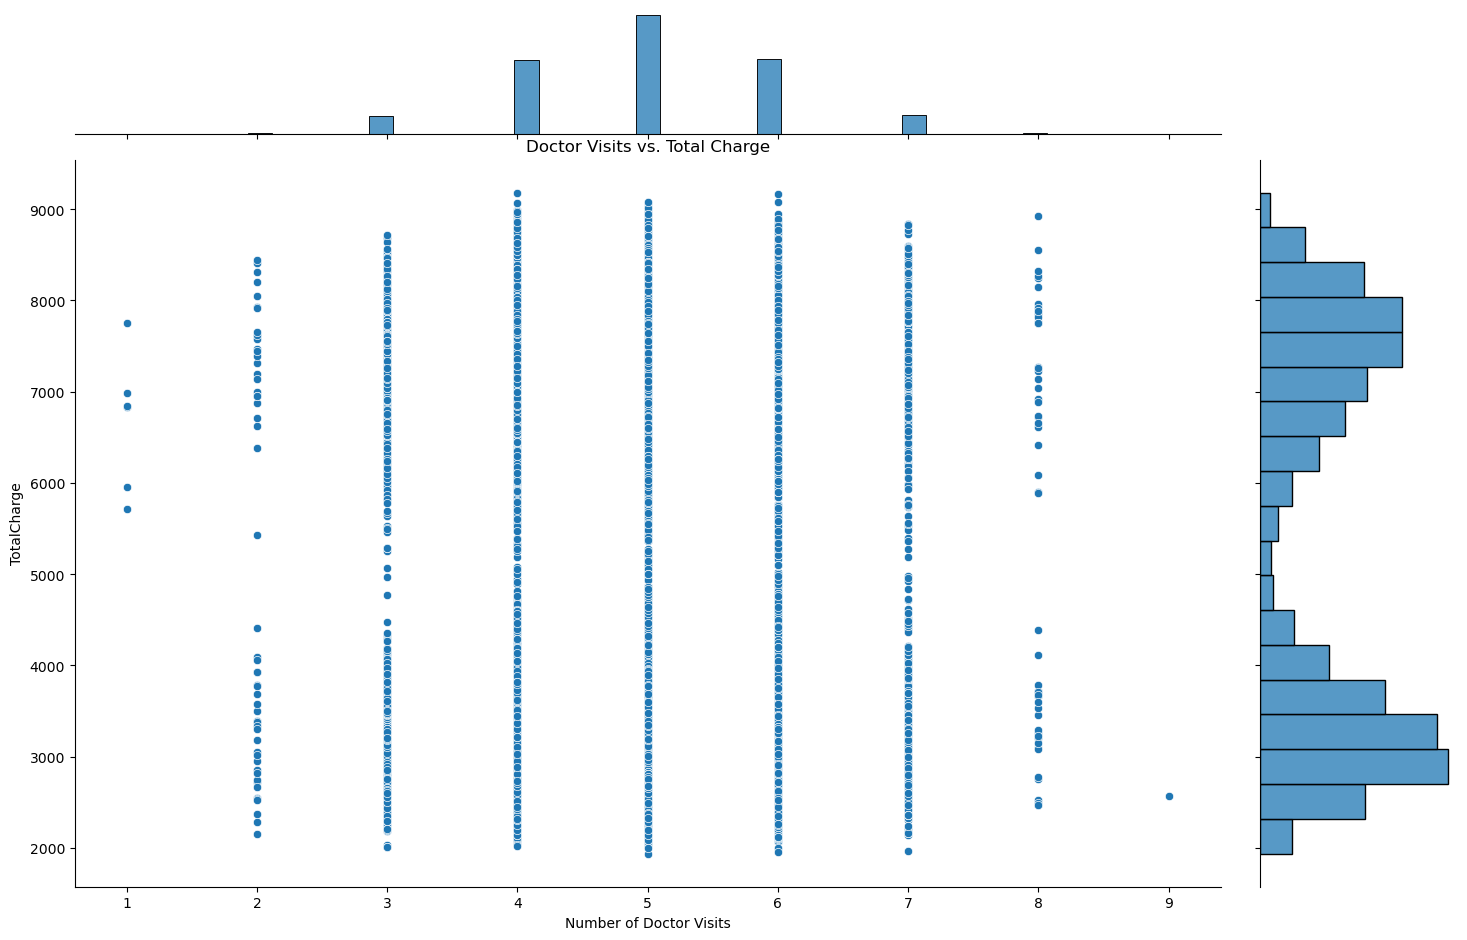

In [26]:
# Doc-Visits vs Total Charge
sns.jointplot(data=df1_no_outliers, x='Doc_visits', y='TotalCharge')
plt.title('Doctor Visits vs. Total Charge')
plt.xlabel('Number of Doctor Visits')
fig = plt.gcf()
fig.set_size_inches(16, 10);

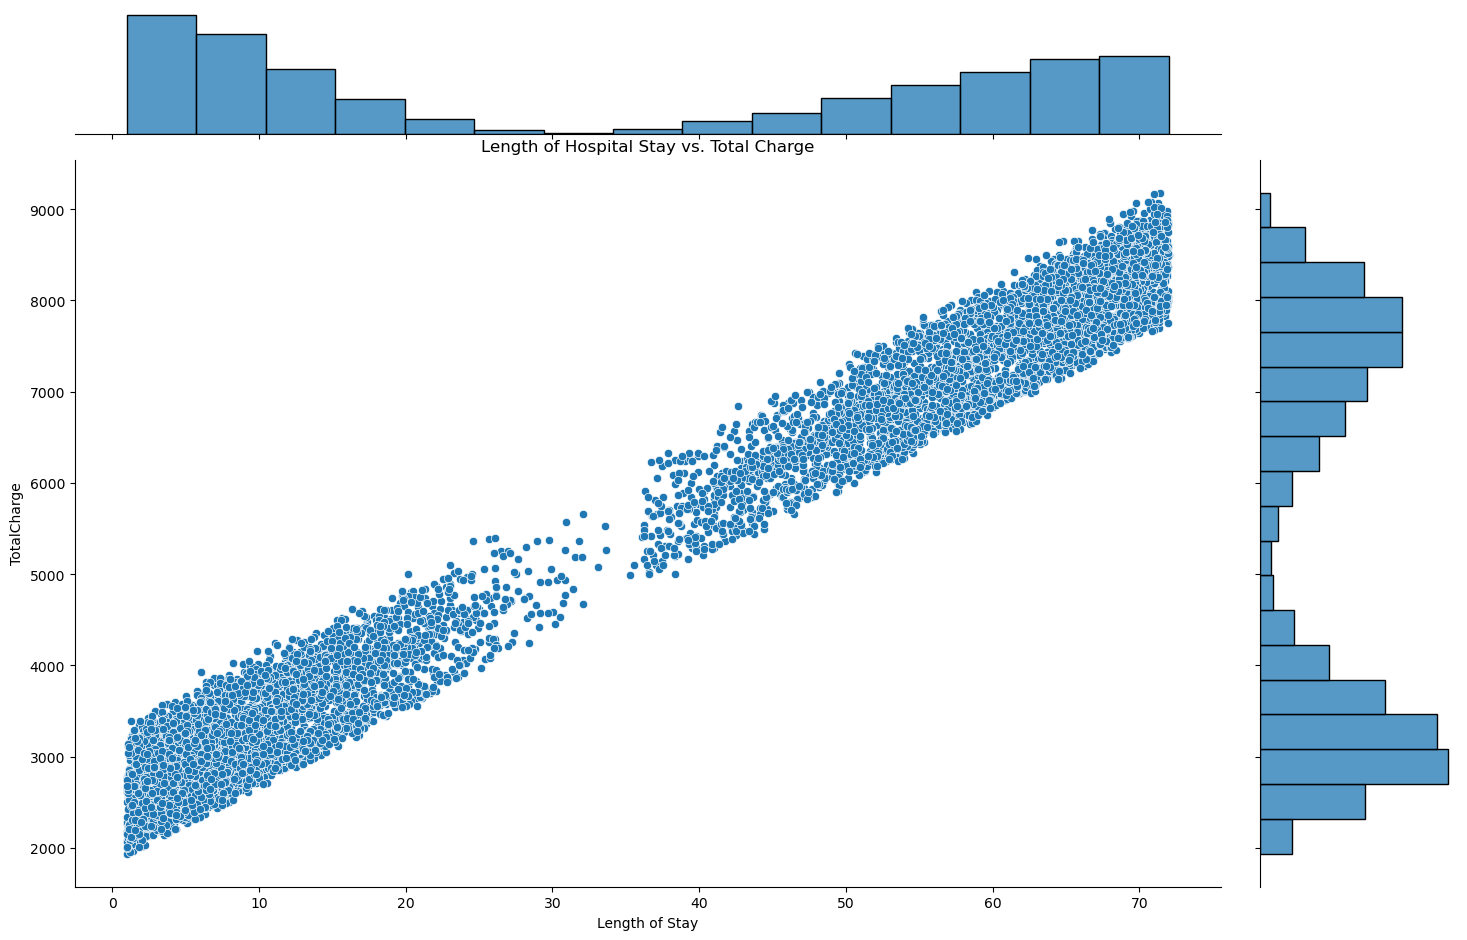

In [27]:
# Initial Days vs Total Charge
sns.jointplot(data=df1_no_outliers, x='Initial_days', y='TotalCharge')
plt.title('Length of Hospital Stay vs. Total Charge')
plt.xlabel('Length of Stay')
fig = plt.gcf()
fig.set_size_inches(16, 10);

### Categorical Variables

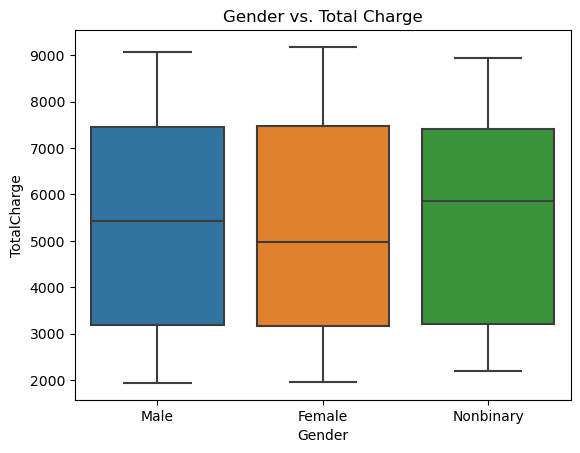

In [28]:
#  Gender vs Total Charge
sns.boxplot(x='Gender', y='TotalCharge', data=df1_no_outliers)
plt.title('Gender vs. Total Charge');

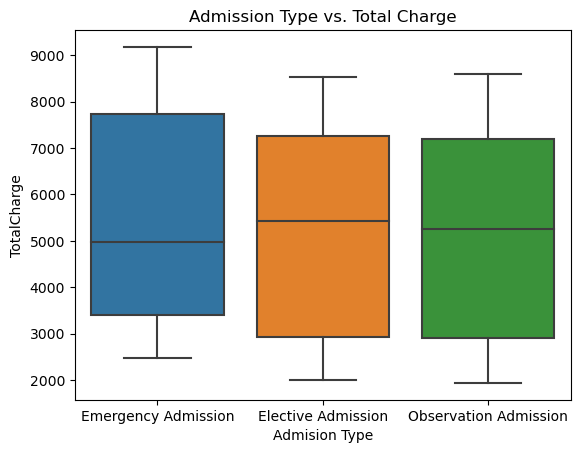

In [29]:
#  Initial Admin vs Total Charge
sns.boxplot(x='Initial_admin', y='TotalCharge', data=df1_no_outliers)
plt.title('Admission Type vs. Total Charge')
plt.xlabel('Admision Type');

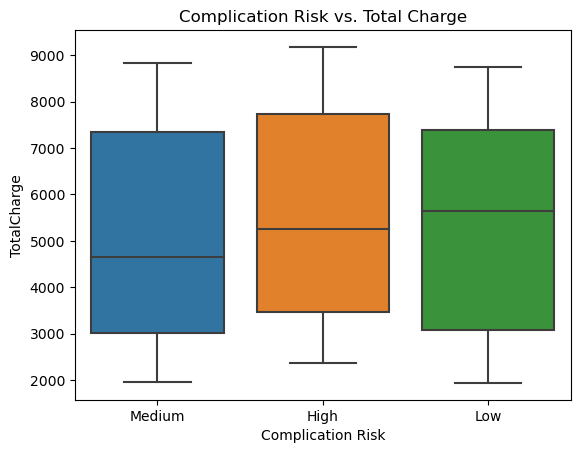

In [30]:
#  Complication_risk vs Total Charge
sns.boxplot(x='Complication_risk', y='TotalCharge', data=df1_no_outliers)
plt.title('Complication Risk vs. Total Charge')
plt.xlabel('Complication Risk');

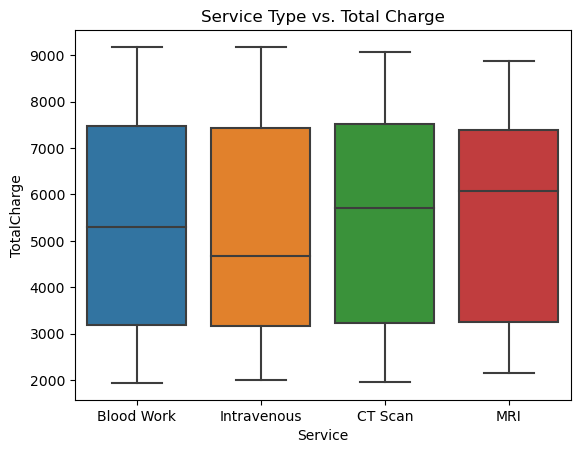

In [31]:
#  Services vs Total Charge
sns.boxplot(x='Services', y='TotalCharge', data=df1_no_outliers)
plt.title('Service Type vs. Total Charge')
plt.xlabel('Service');

# ▶ Data Wrangling  

In [32]:
# Printing datatypes 
df1_no_outliers.dtypes

Age                    int64
Income               float64
Gender                object
Doc_visits             int64
Initial_admin         object
Complication_risk     object
Services              object
Initial_days         float64
TotalCharge          float64
dtype: object

## Re-expression of Categorical Variables  
Our  categorical explanatory variables include both nominal and ordinal variables.There are listed below:  

* Ordinal - __*Complication_risk*__
* Nominal - __*Gender*__, __*Initial_admin*__, and __*Services*__  

### Ordinal Re-Expression

In [33]:
# Checking unique levels in variable Complication risk
df1_no_outliers['Complication_risk'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

We can see that the ordinal variable _*Complication_risk*_ has 3 levels: Low, Medium and High and we will encode them as 0, 1, 2 respectively using the library scikit-learn's OrdinalEncoder class.  
We will first create a list of the risk levels (mentioned above) in ascending order.

In [34]:
# Importing sklean library
from sklearn.preprocessing import OrdinalEncoder

In [35]:
# Creating Encoder Object
oe = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
oe

OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

In [36]:
# Fitting and transforming complication risk column 
df1_no_outliers['Complication_risk'] = oe.fit_transform(df1_no_outliers[['Complication_risk']])

In [37]:
# Checking if encoding was done 
df1_no_outliers.head()

,Age,Income,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge
0,53,86575.93,Male,6,Emergency Admission,1.0,Blood Work,10.585770,3726.702860
1,51,46805.99,Female,4,Emergency Admission,2.0,Intravenous,15.129562,4193.190458
2,53,14370.14,Female,4,Elective Admission,1.0,Blood Work,4.772177,2434.234222
3,78,39741.49,Male,4,Elective Admission,1.0,Blood Work,1.714879,2127.830423
4,22,1209.56,Female,5,Elective Admission,0.0,CT Scan,1.254807,2113.073274


Here we can see the _**Complication_risk**_ column is now encoded.  
We will be moving to the nominal variables.

In [38]:
df1_no_outliers[['Gender', 'Initial_admin', 'Services']].head(10)

,Gender,Initial_admin,Services
0,Male,Emergency Admission,Blood Work
1,Female,Emergency Admission,Intravenous
2,Female,Elective Admission,Blood Work
3,Male,Elective Admission,Blood Work
4,Female,Elective Admission,CT Scan
5,Male,Observation Admission,Blood Work
6,Male,Emergency Admission,Intravenous
7,Female,Observation Admission,Intravenous
8,Male,Emergency Admission,Intravenous
9,Female,Emergency Admission,Blood Work


In [39]:
df1_no_outliers.head()

,Age,Income,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge
0,53,86575.93,Male,6,Emergency Admission,1.0,Blood Work,10.585770,3726.702860
1,51,46805.99,Female,4,Emergency Admission,2.0,Intravenous,15.129562,4193.190458
2,53,14370.14,Female,4,Elective Admission,1.0,Blood Work,4.772177,2434.234222
3,78,39741.49,Male,4,Elective Admission,1.0,Blood Work,1.714879,2127.830423
4,22,1209.56,Female,5,Elective Admission,0.0,CT Scan,1.254807,2113.073274


In [40]:
df1_no_outliers_dummy = pd.get_dummies(df1_no_outliers[['Gender', 'Initial_admin', 'Services']],prefix=['Gender', 'Initial_admin', 'Services'], drop_first=True)

In [41]:
df2 = pd.concat([df1_no_outliers, df1_no_outliers_dummy], axis=1)

In [42]:
df2.drop(['Gender', 'Initial_admin', 'Services'], axis=1, inplace=True)

In [43]:
df2.head()

,Age,Income,Doc_visits,Complication_risk,Initial_days,TotalCharge,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,86575.93,6,1.0,10.585770,3726.702860,1,0,1,0,0,0,0
1,51,46805.99,4,2.0,15.129562,4193.190458,0,0,1,0,0,1,0
2,53,14370.14,4,1.0,4.772177,2434.234222,0,0,0,0,0,0,0
3,78,39741.49,4,1.0,1.714879,2127.830423,1,0,0,0,0,0,0
4,22,1209.56,5,0.0,1.254807,2113.073274,0,0,0,0,1,0,0


_Note: df2 = cleaned and encoded dataframe ready for models_

# ▶ Initial Multiple Linear Regression Model  
We will now construct our initial model

In [44]:
import statsmodels.api as sm
import seaborn as sns

In [45]:
df2.head()

,Age,Income,Doc_visits,Complication_risk,Initial_days,TotalCharge,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,86575.93,6,1.0,10.585770,3726.702860,1,0,1,0,0,0,0
1,51,46805.99,4,2.0,15.129562,4193.190458,0,0,1,0,0,1,0
2,53,14370.14,4,1.0,4.772177,2434.234222,0,0,0,0,0,0,0
3,78,39741.49,4,1.0,1.714879,2127.830423,1,0,0,0,0,0,0
4,22,1209.56,5,0.0,1.254807,2113.073274,0,0,0,0,1,0,0


In [46]:
# Creating feature variables, where X = independent variables and Y=dependent variables
X_data = df2.drop('TotalCharge', axis=1)
Y_data = df2['TotalCharge']

print('The shape of the features is:',X_data.shape)
X_data.head()
print('The shape of the labels:',Y_data.shape)
Y_data.head()

The shape of the features is: (9857, 12)


,Age,Income,Doc_visits,Complication_risk,Initial_days,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,86575.93,6,1.0,10.585770,1,0,1,0,0,0,0
1,51,46805.99,4,2.0,15.129562,0,0,1,0,0,1,0
2,53,14370.14,4,1.0,4.772177,0,0,0,0,0,0,0
3,78,39741.49,4,1.0,1.714879,1,0,0,0,0,0,0
4,22,1209.56,5,0.0,1.254807,0,0,0,0,1,0,0


The shape of the labels: (9857,)


0    3726.702860
1    4193.190458
2    2434.234222
3    2127.830423
4    2113.073274
Name: TotalCharge, dtype: float64

In [47]:
# Adding constant to X_data
X_data = sm.add_constant(X_data)

In [48]:
# Fitting regression model 
model = sm.OLS(Y_data,X_data).fit()
predictions_initial = model.predict(X_data)

In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.714e+05
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:18:11   Log-Likelihood:                -63408.
No. Observations:                9857   AIC:                         1.268e+05
Df Residuals:                    9844   BIC:                         1.269e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [62]:
df2.iloc[50]

Age                                       48.000000
Income                                 64267.400000
Doc_visits                                 5.000000
Complication_risk                          1.000000
Initial_days                              12.286799
TotalCharge                             3214.480030
Gender_Male                                1.000000
Gender_Nonbinary                           0.000000
Initial_admin_Emergency Admission          0.000000
Initial_admin_Observation Admission        1.000000
Services_CT Scan                           0.000000
Services_Intravenous                       1.000000
Services_MRI                               0.000000
Name: 51, dtype: float64

In [82]:
# Examining a series from the predict module
pd.Series(model.predict())

0       3585.119134
1       4180.159796
2       2587.982740
3       2340.164114
4       2071.093246
5       2688.092479
6       3221.740187
7       3359.086540
8       2989.692818
9       3080.518724
10      2925.343968
11      3010.424331
12      2999.339999
13      3100.629970
14      2797.695650
15      2148.806652
16      3283.568257
17      2585.907270
18      2803.016865
19      3340.971291
20      3525.874751
21      2936.479574
22      3249.833377
23      3664.711493
24      4027.708544
25      3502.499514
26      3328.101324
27      4422.749776
28      3588.780747
29      3322.108501
30      2418.915030
31      4555.907606
32      2986.577649
33      3079.945590
34      3229.810750
35      2261.616117
36      3417.611606
37      3814.651181
38      2821.834067
39      2728.419754
40      3171.301979
41      3164.160031
42      3801.514244
43      4148.109537
44      3696.770538
45      3743.989510
46      2207.339508
47      3605.961809
48      3743.919765
49      3768.972054


In [81]:
# Output of Total Charge to compare against
df2['TotalCharge']

0       3726.702860
1       4193.190458
2       2434.234222
3       2127.830423
4       2113.073274
5       2636.691180
6       3694.627161
7       3021.499039
8       2968.402860
9       3147.855813
10      2837.861788
11      3166.627638
12      2908.711720
13      3186.814113
14      2754.770365
15      2295.941875
16      2944.722978
17      2824.312023
18      2698.883482
19      3452.549291
20      3534.815016
21      3282.592435
22      3430.725944
23      3715.033085
24      4300.035326
25      3614.983186
26      3123.109670
27      4318.718733
28      3804.004093
29      3447.317284
31      2658.122426
32      4463.657419
33      3049.915565
34      2816.873007
35      3158.504981
36      2293.183600
37      3414.285086
38      3711.673538
39      2872.499307
40      2781.107852
41      3270.071216
42      2878.861966
43      3714.927496
44      4123.964218
45      3685.359633
46      3553.507736
47      2251.967080
48      3666.735859
49      3924.019760
50      3859.384171


### Checking for Multicolinearity  
A correlation matrix will be used to determine colinearity 

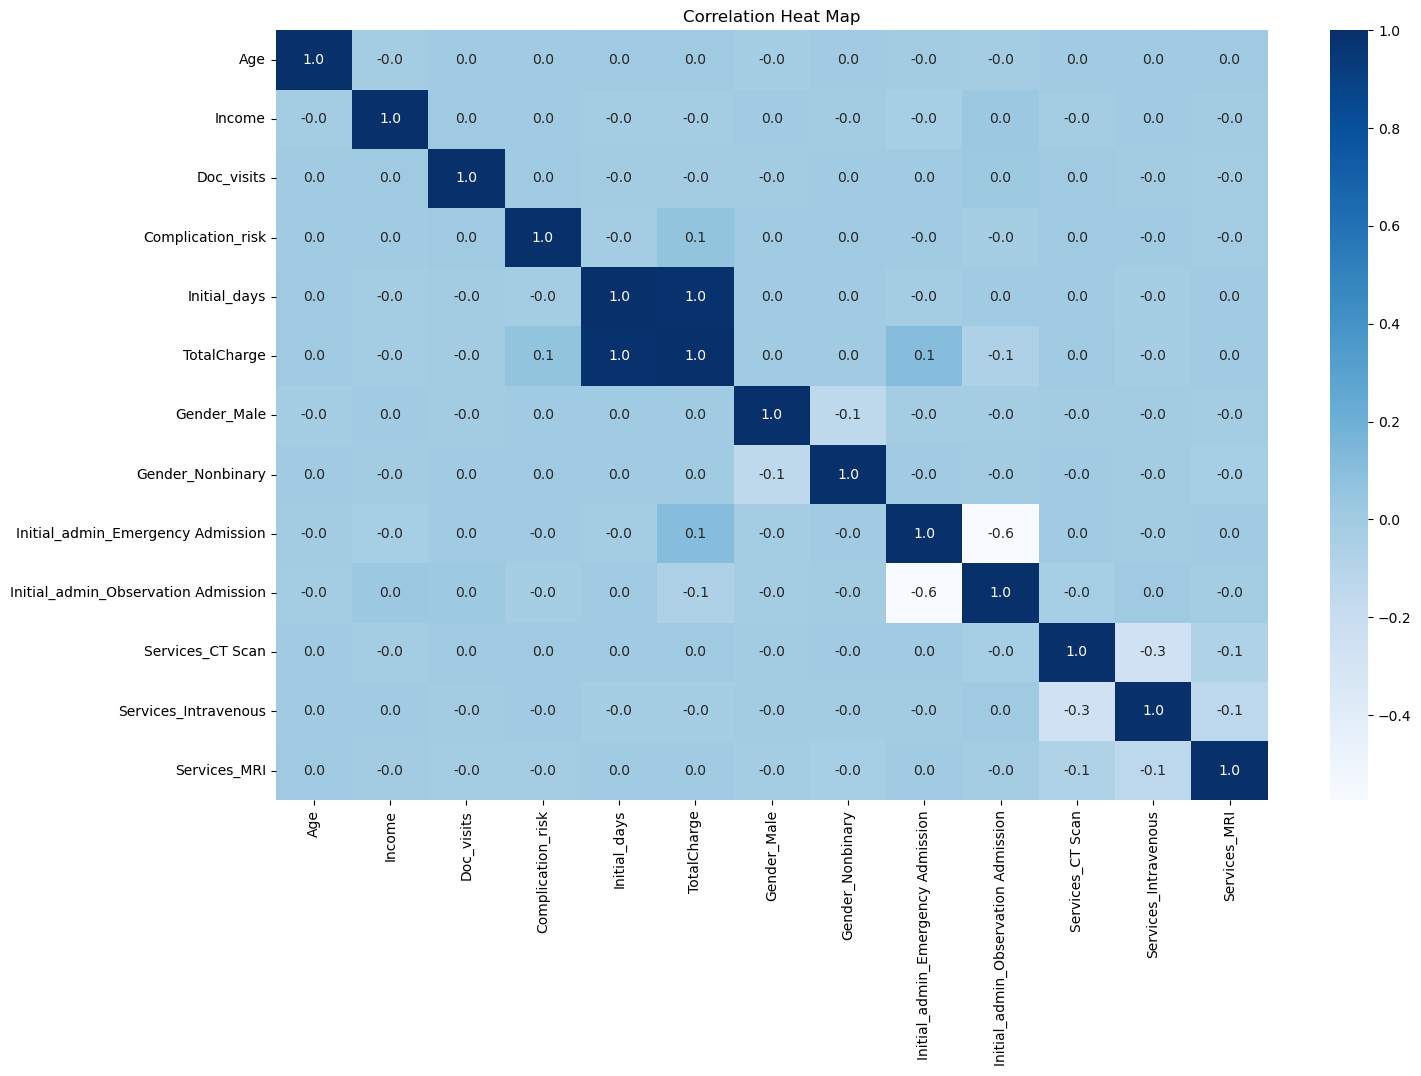

In [50]:
# Visualizing correlation heatmap in seaborn
sns.heatmap(df2.corr(),annot=True, fmt=".1f", cmap='Blues')
plt.title('Correlation Heat Map')
fig = plt.gcf()
fig.set_size_inches(16, 10);

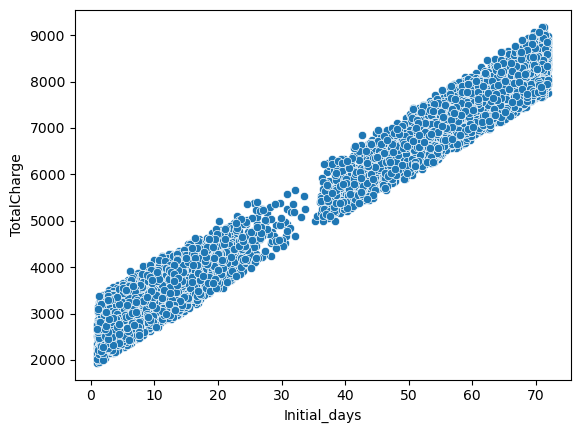

In [51]:
sns.scatterplot(data=df2, x='Initial_days', y='TotalCharge');

We can see that Initial_days and Total Charge have a strong colinearity - we will drop Initial_days and rerun the model.

# ▶ Reduced Multiple Linear Regression Model

In [52]:
X_data2 = df2.drop(['TotalCharge', 'Initial_days'], axis=1)
Y_data = df2['TotalCharge']

print('The shape of the new features is:',X_data2.shape)
X_data2.head()
print('The shape of the labels:',Y_data.shape)
Y_data.head()

The shape of the new features is: (9857, 11)


,Age,Income,Doc_visits,Complication_risk,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,86575.93,6,1.0,1,0,1,0,0,0,0
1,51,46805.99,4,2.0,0,0,1,0,0,1,0
2,53,14370.14,4,1.0,0,0,0,0,0,0,0
3,78,39741.49,4,1.0,1,0,0,0,0,0,0
4,22,1209.56,5,0.0,0,0,0,0,1,0,0


The shape of the labels: (9857,)


0    3726.702860
1    4193.190458
2    2434.234222
3    2127.830423
4    2113.073274
Name: TotalCharge, dtype: float64

In [53]:
# Adding constant to X_data2
X_data2 = sm.add_constant(X_data2)

In [54]:
X_data2.head()

,const,Age,Income,Doc_visits,Complication_risk,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI
0,1.0,53,86575.93,6,1.0,1,0,1,0,0,0,0
1,1.0,51,46805.99,4,2.0,0,0,1,0,0,1,0
2,1.0,53,14370.14,4,1.0,0,0,0,0,0,0,0
3,1.0,78,39741.49,4,1.0,1,0,0,0,0,0,0
4,1.0,22,1209.56,5,0.0,0,0,0,0,1,0,0


In [55]:
# Fitting regression model 
model2 = sm.OLS(Y_data,X_data2).fit()
predictions_initial2 = model2.predict(X_data2)

In [56]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     14.67
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           1.26e-28
Time:                        16:18:13   Log-Likelihood:                -89678.
No. Observations:                9857   AIC:                         1.794e+05
Df Residuals:                    9845   BIC:                         1.795e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

# ▶ Regression Diagnostics

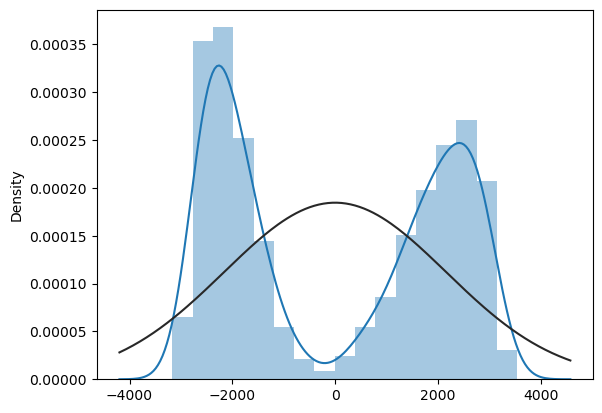

In [57]:
from scipy import stats
sns.distplot(model2.resid, fit=stats.norm);

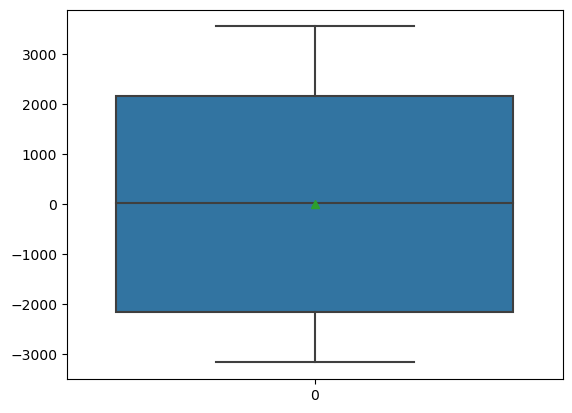

In [58]:
sns.boxplot(model2.resid, showmeans=True);

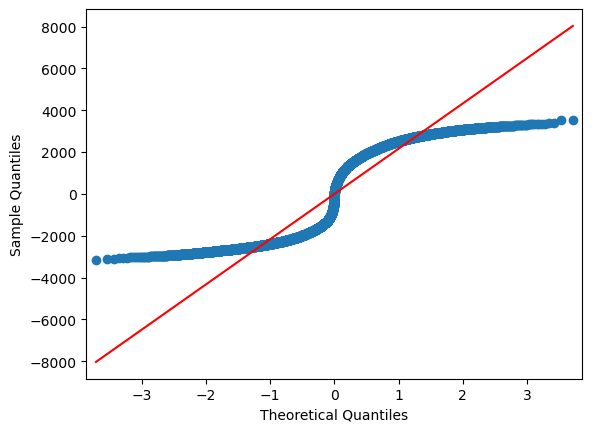

In [59]:
sm.qqplot(model2.resid, line='s');

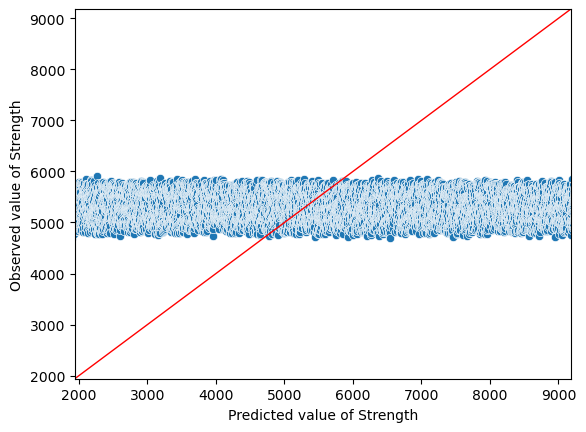

In [60]:
Y_data_max = Y_data.max()
Y_data_min = Y_data.min()

ax = sns.scatterplot(model2.fittedvalues)
ax.set(ylim=(Y_data_min, Y_data_max))
ax.set(xlim=(Y_data_min, Y_data_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_data_min, Y_data_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show();

# ▶ Residual Plots (Task I)

# ▶ Logistic Regression Model